In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


In [3]:
x = np.linspace(-5, 10, 1000)

In [4]:
def posterior(likelihood, prior):
    norm = sp.integrate.quad(lambda x: likelihood(x)*prior(x), -np.inf, np.inf)[0]
    return lambda x: likelihood(x)*prior(x)/norm

likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,0.5).pdf
post = posterior(likelihood, prior)

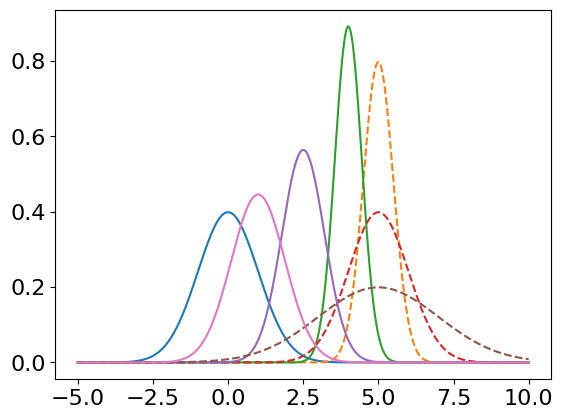

In [5]:
plt.plot(x, likelihood(x))

prior = sp.stats.norm(5,0.5).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

prior = sp.stats.norm(5,1).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

prior = sp.stats.norm(5,2).pdf
post = posterior(likelihood, prior)
plt.plot(x, prior(x), '--')
plt.plot(x, post(x))

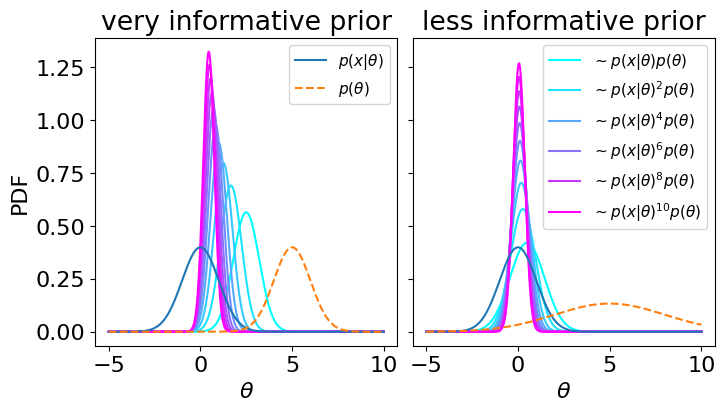

In [6]:
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,1).pdf
post = posterior(likelihood, prior)

colors = plt.cm.cool(np.linspace(0,1,10))

ax[0].plot(x, post(x), color=colors[0])

for i in range(1,10):
    post = posterior(likelihood, post)
    if (i+1)%2==0:
        ax[0].plot(x, post(x), color=colors[i])
    else:
        ax[0].plot(x, post(x), color=colors[i])

ax[0].plot(x, likelihood(x), label=r'$p(x|\theta)$')
ax[0].plot(x, prior(x), '--', label=r'$p(\theta)$')
        
likelihood = sp.stats.norm(0,1).pdf
prior = sp.stats.norm(5,3).pdf
post = posterior(likelihood, prior)

ax[1].plot(x, post(x), color=colors[0], label=rf'$\sim p(x|\theta)p(\theta)$')

for i in range(1,10):
    post = posterior(likelihood, post)
    if (i+1)%2==0:
        ax[1].plot(x, post(x), color=colors[i], label=rf'$\sim p(x|\theta)^{{{i+1}}}p(\theta)$')
    else:
        ax[1].plot(x, post(x), color=colors[i])

ax[1].plot(x, likelihood(x))
ax[1].plot(x, prior(x), '--')
        
ax[0].set_xlabel(r'$\theta$')
ax[1].set_xlabel(r'$\theta$')
ax[0].set_ylabel(r'PDF')

ax[0].set_title(r'very informative prior')
ax[1].set_title(r'less informative prior')


plt.subplots_adjust(wspace=0.05, hspace=0)

ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

fig.savefig('plots/updating.pdf', bbox_inches='tight')